In [2]:
import numpy as np
import pandas as pd
import matplotlib as mp
import statsmodels.api as sm
from statsmodels.sandbox.regression.gmm import GMM
from statsmodels.tsa.stattools import acf
from statsmodels.regression.linear_model import GLS, GLSAR
from scipy.linalg import toeplitz
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn import linear_model as lm
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve, mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import seaborn as sns

**Part A (25%)**
1. Download the “dataset_lm.csv” file from Canvas and upload it to Jupyter Notebook.
2. Run the OLS model by using the dependent and explanatory variables in the dataset.
3. Show your summary table in Python and interpret your results in the summary report.

In [3]:
df = pd.read_csv("/Users/mikeredshaw/Documents/Schulich MBAN/Predictive Modelling | MBAN 5110 U /Assignment 1/dataset_lm.csv")

In [4]:
df.describe(include="all")

,Dependent Var,Explanatory Var #1,Explanatory Var #2,Explanatory Var #3,Explanatory Var #4,Explanatory Var #5,Explanatory Var #6,Explanatory Var #7,Explanatory Var #8,Explanatory Var #9,Explanatory Var #10,Explanatory Var #11,Explanatory Var #12,Explanatory Var #13,Explanatory Var #14,Explanatory Var #15
count,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000
mean,67.838396,7.762058,59.725134,0.500000,-16.078411,50.133715,10.420808,61.887309,1.566351,-24.511691,49.728665,7.740874,60.765794,0.500000,-16.673762,50.066901
std,25.676960,7.013243,9.579112,0.500593,8.111197,6.975674,11.520725,14.819969,1.115260,8.500500,6.910690,7.102714,9.525835,0.500593,8.106466,6.794584
min,-2.997183,-4.832834,44.124858,0.000000,-29.774797,30.009511,-9.828552,34.093154,0.000000,-39.979696,26.436407,-4.949728,44.158200,0.000000,-29.750628,32.118882
25%,49.482037,1.720182,51.617692,0.000000,-23.792637,45.423422,-0.174835,49.952772,1.000000,-32.037707,45.283603,1.838210,52.849792,0.000000,-23.797763,45.825931
50%,66.780110,7.905455,59.735139,0.500000,-15.875481,50.093602,10.422513,62.554591,2.000000,-23.767548,49.842746,8.055297,60.773906,0.500000,-17.373619,50.038667
75%,86.801496,13.684104,67.870073,1.000000,-9.185191,54.896583,21.059713,74.441216,3.000000,-17.419390,54.576381,14.020396,69.262757,1.000000,-9.627544,54.962602
max,133.384795,19.973331,76.973576,1.000000,-2.060708,70.365951,29.994610,86.895006,3.000000,-10.129522,68.201681,19.992891,76.639179,1.000000,-2.003168,69.147818


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dependent Var        422 non-null    float64
 1   Explanatory Var #1   422 non-null    float64
 2   Explanatory Var #2   422 non-null    float64
 3   Explanatory Var #3   422 non-null    int64  
 4   Explanatory Var #4   422 non-null    float64
 5   Explanatory Var #5   422 non-null    float64
 6   Explanatory Var #6   422 non-null    float64
 7   Explanatory Var #7   422 non-null    float64
 8   Explanatory Var #8   422 non-null    int64  
 9   Explanatory Var #9   422 non-null    float64
 10  Explanatory Var #10  422 non-null    float64
 11  Explanatory Var #11  422 non-null    float64
 12  Explanatory Var #12  422 non-null    float64
 13  Explanatory Var #13  422 non-null    int64  
 14  Explanatory Var #14  422 non-null    float64
 15  Explanatory Var #15  422 non-null    flo

In [6]:
df.head()

,Dependent Var,Explanatory Var #1,Explanatory Var #2,Explanatory Var #3,Explanatory Var #4,Explanatory Var #5,Explanatory Var #6,Explanatory Var #7,Explanatory Var #8,Explanatory Var #9,Explanatory Var #10,Explanatory Var #11,Explanatory Var #12,Explanatory Var #13,Explanatory Var #14,Explanatory Var #15
0,56.293458,13.698667,50.639873,0,-18.568035,45.121911,11.412501,56.410757,2,-12.281132,38.996909,-3.010548,49.195073,0,-21.153143,46.919314
1,58.473431,2.714725,65.845845,1,-25.105932,47.190213,10.080280,65.383107,3,-36.763585,51.654939,4.991111,45.591729,0,-6.474403,53.383508
2,94.195330,11.618072,65.072497,0,-7.897464,52.163036,11.057301,82.812717,0,-15.733547,48.913837,-2.457696,56.608806,0,-27.903299,48.515026
3,29.074583,0.818623,45.408996,1,-18.316132,54.356714,5.029029,48.812471,1,-12.825591,45.851732,14.974177,47.362594,1,-10.064411,55.266254
4,86.035569,9.077544,73.548021,0,-19.204165,47.186807,12.128134,62.520911,2,-13.804860,47.765904,9.593982,53.700562,0,-17.546302,48.150543


In [7]:
df.columns

Index(['Dependent Var', 'Explanatory Var #1', 'Explanatory Var #2',
       'Explanatory Var #3', 'Explanatory Var #4', 'Explanatory Var #5',
       'Explanatory Var #6', 'Explanatory Var #7', 'Explanatory Var #8',
       'Explanatory Var #9', 'Explanatory Var #10', 'Explanatory Var #11',
       'Explanatory Var #12', 'Explanatory Var #13', 'Explanatory Var #14',
       'Explanatory Var #15'],
      dtype='object')

In [8]:
y = df["Dependent Var"]
x = df[["Explanatory Var #1","Explanatory Var #2", "Explanatory Var #3",\
                                             "Explanatory Var #4","Explanatory Var #5", "Explanatory Var #6",\
                                             "Explanatory Var #7","Explanatory Var #8", "Explanatory Var #9",\
                                             "Explanatory Var #10","Explanatory Var #11", "Explanatory Var #12",\
                                             "Explanatory Var #13","Explanatory Var #14", "Explanatory Var #15"]]

In [9]:
x_updated = sm.add_constant(x)
model_1 = sm.OLS(y, x_updated).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Dependent Var   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.593e+30
Date:                Sun, 29 Oct 2023   Prob (F-statistic):               0.00
Time:                        23:45:17   Log-Likelihood:                 12339.
No. Observations:                 422   AIC:                        -2.465e+04
Df Residuals:                     406   BIC:                        -2.458e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  32.0000   4.32e-14    7.4e+14      0.000      32.000      32.000
Explanatory Var #1      1.3000   3.49e-16   3.72e+15      0.000       1.300       1.300
Explanatory Var #2      1.7000   2.54e-16    6.7e+15      0.000       1.700       1.700
Explanatory Var #3      6.2000   4.87e-15   1.27e+15      0.000       6.200       6.200
Explanatory Var #4      2.1000      3e-16      7e+15      0.000       2.100       2.100
Explanatory Var #5     -0.9000   3.51e-16  -2.56e+15      0.000      -0.900      -0.900
Explanatory Var #6  -3.842e-16   2.12e-16     -1.812      0.071   -8.01e-16    3.27e-17
Explanatory Var #7  -9.626e-16   1.64e-16     -5.876      0.000   -1.28e-15   -6.41e-16
Explanatory Var #8  -2.789e-15   2.23e-15     -1.253      0.211   -7.17e-15    1.59e-15
Explanatory Var #9   7.033e-16   2.85e-16      2.471      0.014    1.44e-16    1.26e-15
Explanatory Var #10 -5.371e-16   3.55e-16     -1.514      0.131   -1.23e-15     1.6e-16
Explanatory Var #11 -1.433e-15   3.43e-16     -4.178      0.000   -2.11e-15   -7.59e-16
Explanatory Var #12  1.064e-15   2.57e-16      4.146      0.000     5.6e-16    1.57e-15
Explanatory Var #13 -1.977e-14   4.92e-15     -4.020      0.000   -2.94e-14   -1.01e-14
Explanatory Var #14 -5.991e-16   3.02e-16     -1.985      0.048   -1.19e-15   -5.64e-18
Explanatory Var #15 -3.694e-15    3.6e-16    -10.274      0.000    -4.4e-15   -2.99e-15
==============================================================================
Omnibus:                        1.606   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.448   Jarque-Bera (JB):                1.555
Skew:                           0.149   Prob(JB):                        0.460
Kurtosis:                       2.990   Cond. No.                     2.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Part B (25%)**
1. Use error values from the OLS model to calculate their standard deviation and
autocorrelation values for the first three lags.
2. Then, run the GLS model accordingly.
3. Show your summary table in Python and interpret your results in the summary report.

In [10]:
error_values = y - model_1.predict(x_updated)
error_values

0     -4.973799e-14
1      7.105427e-15
2      7.105427e-14
3      1.421085e-14
4      1.421085e-14
           ...     
417   -7.105427e-15
418    3.197442e-14
419   -7.105427e-15
420    0.000000e+00
421   -5.684342e-14
Length: 422, dtype: float64

In [11]:
sigma = np.std(error_values)
sigma

4.8420848299516345e-14

In [12]:
autocorrelation_values = acf(error_values, nlags=3)

autocorrelation_1 = autocorrelation_values[1]
autocorrelation_2 = autocorrelation_values[2]
autocorrelation_3 = autocorrelation_values[3]

print(autocorrelation_1)
print(autocorrelation_2)
print(autocorrelation_3)

0.058251833821782395
0.08620278257468605
-0.012158774925868933


In [13]:
cov_matrix = sigma**2*toeplitz(np.append([1,autocorrelation_1,autocorrelation_2,autocorrelation_3],np.zeros(418)))
sm.GLS(y,x_updated,cov_matrix).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:          Dependent Var   R-squared:                       1.000
Model:                            GLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.910e+29
Date:                Sun, 29 Oct 2023   Prob (F-statistic):               0.00
Time:                        23:45:17   Log-Likelihood:                 11829.
No. Observations:                 422   AIC:                        -2.363e+04
Df Residuals:                     406   BIC:                        -2.356e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  32.0000   1.45e-13    2.2e+14      0.000      32.000      32.000
Explanatory Var #1      1.3000   1.16e-15   1.12e+15      0.000       1.300       1.300
Explanatory Var #2      1.7000   8.48e-16      2e+15      0.000       1.700       1.700
Explanatory Var #3      6.2000   1.62e-14   3.82e+14      0.000       6.200       6.200
Explanatory Var #4      2.1000      1e-15    2.1e+15      0.000       2.100       2.100
Explanatory Var #5     -0.9000   1.18e-15  -7.63e+14      0.000      -0.900      -0.900
Explanatory Var #6   6.719e-15   7.09e-16      9.474      0.000    5.32e-15    8.11e-15
Explanatory Var #7  -5.428e-15   5.45e-16     -9.964      0.000    -6.5e-15   -4.36e-15
Explanatory Var #8  -1.512e-15   7.44e-15     -0.203      0.839   -1.61e-14    1.31e-14
Explanatory Var #9   1.328e-15   9.45e-16      1.405      0.161    -5.3e-16    3.19e-15
Explanatory Var #10  2.709e-17   1.18e-15      0.023      0.982    -2.3e-15    2.35e-15
Explanatory Var #11 -1.252e-16   1.14e-15     -0.109      0.913   -2.37e-15    2.12e-15
Explanatory Var #12  1.546e-15   8.58e-16      1.803      0.072    -1.4e-16    3.23e-15
Explanatory Var #13  7.366e-15   1.63e-14      0.451      0.652   -2.47e-14    3.94e-14
Explanatory Var #14  1.842e-18   1.02e-15      0.002      0.999      -2e-15       2e-15
Explanatory Var #15  1.406e-15    1.2e-15      1.175      0.241   -9.47e-16    3.76e-15
==============================================================================
Omnibus:                        6.816   Durbin-Watson:                   1.132
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                4.388
Skew:                           0.063   Prob(JB):                        0.111
Kurtosis:                       2.516   Cond. No.                     2.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Part C (25%)**
1. Split the dataset into two as the training and test sets (test size = 0.5).
2. Run the Lasso model with alpha=1 and estimate the coefficients using the training set.
3. Then, calculate the mean absolute percentage error using the test set.
4. Find an approximate value for alpha that minimizes the mean absolute percentage error.

In [14]:
X_new = x_updated.drop(columns=['const'])
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.5)

In [15]:
model_lasso = lm.Lasso(alpha=1).fit(X_train,y_train)
model_lasso.coef_

array([ 1.26661291,  1.69376086,  2.16655509,  2.0841667 , -0.87028759,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ])

In [16]:
lasso_pred = model_lasso.predict(X_test)
mean_absolute_percent = (mean_absolute_percentage_error(y_test, lasso_pred)) * 100
print(f"Mean Absolute Percentage Error = {mean_absolute_percent}")

Mean Absolute Percentage Error = 4.162807498367439


In [17]:
alphas = [0.01, 0.05, 0.1, 0.3, 0.6, 0.8, 1.0, 5.0, 10.0]
mean_absolute_percent_values = []

for alpha in alphas:
    model_lasso = Lasso(alpha=alpha)
    model_lasso.fit(X_train, y_train)

    lasso_pred = model_lasso.predict(X_test)

    mean_absolute_percent = (mean_absolute_percentage_error(y_test, lasso_pred)) * 100
    mean_absolute_percent_values.append(mean_absolute_percent)

    print(f"Alpha: {alpha} - Mean Absolute Percentage Error: {mean_absolute_percent}")

Alpha: 0.01 - Mean Absolute Percentage Error: 0.04161945045298013
Alpha: 0.05 - Mean Absolute Percentage Error: 0.2081420813170015
Alpha: 0.1 - Mean Absolute Percentage Error: 0.4162806717085871
Alpha: 0.3 - Mean Absolute Percentage Error: 1.2488416205391355
Alpha: 0.6 - Mean Absolute Percentage Error: 2.497684131797051
Alpha: 0.8 - Mean Absolute Percentage Error: 3.3302458189457096
Alpha: 1.0 - Mean Absolute Percentage Error: 4.162807498367439
Alpha: 5.0 - Mean Absolute Percentage Error: 7.010073812939652
Alpha: 10.0 - Mean Absolute Percentage Error: 8.219786329360312


In [18]:
from sklearn.linear_model import Ridge

In [19]:
alphas = np.logspace(-6, 6, 13)

best_mape = float('inf')
best_alpha = None

for alpha in alphas:
    clf = Ridge(alpha=alpha)

    clf.fit(X_train, y_train)
    
    train_pred = clf.predict(X_train)

    mape = np.mean(np.abs((y_train - train_pred) / y_train)) * 100

    if mape < best_mape:
        best_mape = mape
        best_alpha = alpha

print(f'Best MAPE: {best_mape}%')
print(f'Best alpha: {best_alpha}')

Best MAPE: 1.1009931492906396e-07%
Best alpha: 1e-06


Part D (25%)
1. Use the demand data given in the table and develop an appropriate forecasting model
(i.e., the tailored regularization discussed in the class—see your slides for more info)
that exploits the available information given in the table as much as possible.
2. Interpret your results.

In [20]:
data = {
    'Month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25],
    'Demand': [100, 112, 107, 103, 91, 85, 84, 85, 79, 81, 134, 86, 99, 89, 111, 114, 118, 163, 193, 143, 144, 202, 158, 160, 144],
    'Advance_Demand': [71, 30, 75, 64, 41, 51, 42, 51, 57, 49, 134, 52, 99, 56, 81, 79, 73, 163, 193, 99, 91, 202, 105, 101, 96] 
}

df_table = pd.DataFrame(data)

<Axes: xlabel='Month', ylabel='Demand'>

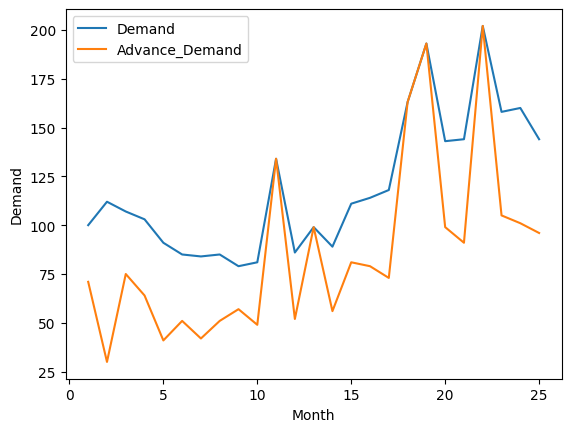

In [21]:
sns.lineplot(data=df_table, x='Month', y= 'Demand', label = 'Demand')
sns.lineplot(data=df_table, x='Month', y='Advance_Demand', label = 'Advance_Demand')

In [22]:
y_table = df_table['Demand'][1:].values
X_table = df_table['Demand'][:-1].values.reshape(-1, 1)
L = df_table['Advance_Demand'][1:].values

In [23]:
def objective(beta, X, y):
    predictions = X.dot(beta)
    return np.sum((y - predictions)**2)

In [24]:
def constraint(beta, X, L):
    predictions = X.dot(beta)
    return predictions - L

In [25]:
from scipy.optimize import minimize

In [26]:
beta0 = [0]

In [27]:
result = minimize(
    fun=objective,
    x0=beta0,
    args=(X_table, y_table),
    constraints={'type': 'ineq', 'fun': constraint, 'args': (X_table, L)},
)

In [28]:
beta_opt = result.x
print("Optimal beta:", beta_opt)

Optimal beta: [1.65432099]


In [29]:
predictions = X_table.dot(beta_opt)
print("Predictions:", predictions)

Predictions: [165.43209876 185.28395062 177.01234568 170.39506173 150.54320988
 140.61728395 138.96296296 140.61728395 130.69135802 134.
 221.67901234 142.27160494 163.77777778 147.2345679  183.62962963
 188.59259259 195.20987654 269.65432099 319.28395061 236.56790123
 238.22222222 334.1728395  261.38271605 264.69135802]


In [30]:
from scipy.optimize import minimize
import numpy as np

betas = np.linspace(start=-10, stop=10, num=100)

best_mape = float('inf')
best_beta = None
for beta in betas:
    beta0 = [beta]
    
    result = minimize(
        fun=objective,
        x0=beta0,
        args=(X_table, y_table),
        constraints={'type': 'ineq', 'fun': constraint, 'args': (X_table, L)},
    )

    beta_opt = result.x
    predictions = X_table.dot(beta_opt)

    mape = np.mean(np.abs((y_table - predictions) / y_table)) * 100
    if mape < best_mape:
        best_mape = mape
        best_beta = beta_opt

print(f'Best MAPE: {best_mape}%')
print(f'Best beta: {best_beta}')

Best MAPE: 34.62529858337541%
Best beta: [1.31313131]
